In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Librerias Importadas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# **2. Analisis información del dataset**

## **2.1. Dataset**

Importamos la base de datos, la cual fue previamente filtrada por medio de la variable objetivo (`RETIROS_REDENCIONES`), donde se excluyeron los valores negativos y aquellos iguales a cero.

In [4]:

# Ruta al archivo CSV
rentacsv = r'C:\Users\TAWTOCA\OneDrive - Universidad del Norte\Documentos\Visual Files\Rentabilidad_filtrado.csv'

# Importar el archivo CSV a un DataFrame
df = pd.read_csv(rentacsv)

# Mostrar las primeras filas del DataFrame
print(df.head())


  FECHA_CORTE  TIPO_ENTIDAD                NOMBRE_TIPO_ENTIDAD  \
0  06/07/2020             5             SF-SOCIEDAD FIDUCIARIA   
1  23/08/2023             5             SF-SOCIEDAD FIDUCIARIA   
2  31/05/2024            85  COMISIONISTAS DE BOLSA DE VALORES   
3  09/09/2022             5             SF-SOCIEDAD FIDUCIARIA   
4  01/10/2022             5             SF-SOCIEDAD FIDUCIARIA   

   CODIGO_ENTIDAD                                   NOMBRE_ENTIDAD  \
0              39                                 Fiduagraria S.A.   
1              39                                 Fiduagraria S.A.   
2               3  Acciones Y Valores S.A.  Comisionistas De Bolsa   
3              40                                       Fiducoldex   
4               3   Bbva Asset Management S.A. Sociedad Fiduciaria   

   TIPO_NEGOCIO         NOMBRE_TIPO_PATRIMONIO  SUBTIPO_NEGOCIO  \
0             9  FONDOS DE INVERSIÓN COLECTIVA                1   
1             9  FONDOS DE INVERSIÓN COLECTIVA  

### **2.1.1. Identificación NA's**

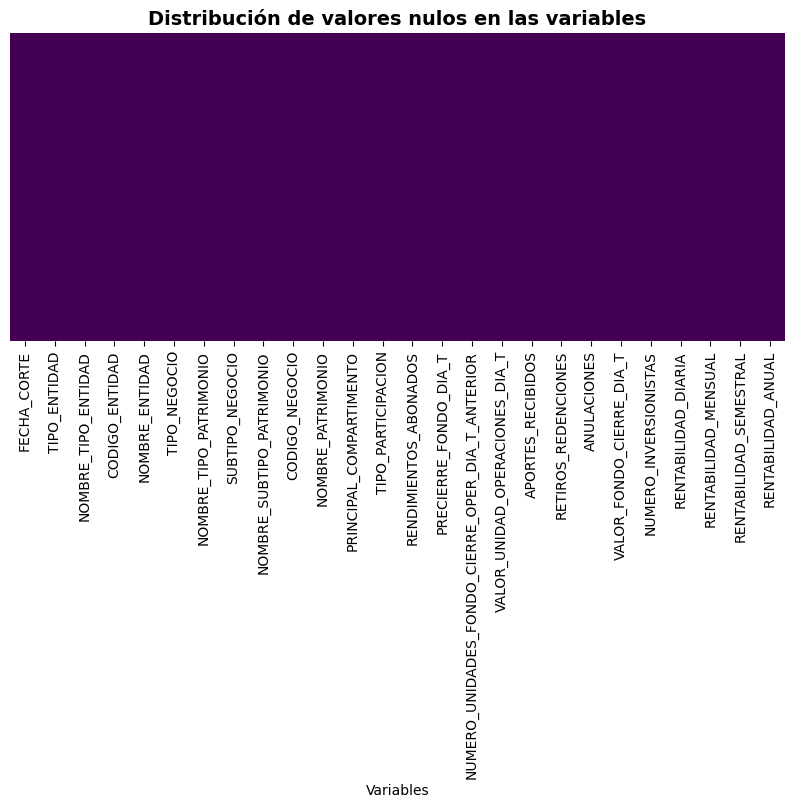

In [5]:
plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Distribución de valores nulos en las variables",
          fontsize=14, fontweight="bold")
plt.xlabel("Variables")
plt.show()

Identificamos si hay datos faltantes en la base de datos para proceder a partir de ahí.

In [6]:
df.isna().sum()

FECHA_CORTE                                         0
TIPO_ENTIDAD                                        0
NOMBRE_TIPO_ENTIDAD                                 0
CODIGO_ENTIDAD                                      0
NOMBRE_ENTIDAD                                      0
TIPO_NEGOCIO                                        0
NOMBRE_TIPO_PATRIMONIO                              0
SUBTIPO_NEGOCIO                                     0
NOMBRE_SUBTIPO_PATRIMONIO                           0
CODIGO_NEGOCIO                                      0
NOMBRE_PATRIMONIO                                   0
PRINCIPAL_COMPARTIMENTO                             0
TIPO_PARTICIPACION                                  0
RENDIMIENTOS_ABONADOS                               0
PRECIERRE_FONDO_DIA_T                               0
NUMERO_UNIDADES_FONDO_CIERRE_OPER_DIA_T_ANTERIOR    0
VALOR_UNIDAD_OPERACIONES_DIA_T                      0
APORTES_RECIBIDOS                                   0
RETIROS_REDENCIONES         

### **2.1.2. Información General**

```{important}
Al momento de graficar algunas variables se utilizó tranformación logarítmica en los datos, debido a que el gran rango de los mismos dificultaba la visualización de los mismos.
```

In [7]:
df.describe()

,TIPO_ENTIDAD,CODIGO_ENTIDAD,TIPO_NEGOCIO,SUBTIPO_NEGOCIO,CODIGO_NEGOCIO,PRINCIPAL_COMPARTIMENTO,TIPO_PARTICIPACION,RENDIMIENTOS_ABONADOS,PRECIERRE_FONDO_DIA_T,NUMERO_UNIDADES_FONDO_CIERRE_OPER_DIA_T_ANTERIOR,VALOR_UNIDAD_OPERACIONES_DIA_T,APORTES_RECIBIDOS,RETIROS_REDENCIONES,ANULACIONES,VALOR_FONDO_CIERRE_DIA_T,NUMERO_INVERSIONISTAS,RENTABILIDAD_DIARIA,RENTABILIDAD_MENSUAL,RENTABILIDAD_SEMESTRAL,RENTABILIDAD_ANUAL
count,634999.000000,634999.000000,634999.0,634999.000000,634999.000000,634999.000000,634999.000000,6.349990e+05,6.349990e+05,6.349990e+05,6.349990e+05,6.349990e+05,6.349990e+05,6.349990e+05,6.349990e+05,634999.000000,6.349990e+05,6.349990e+05,6.349990e+05,634999.000000
mean,24.940435,26.422873,9.0,1.139347,38445.295254,1.005472,599.404374,5.239969e+07,3.028370e+11,1.040848e+09,1.131988e+05,1.189552e+10,1.211972e+10,-9.213148e+07,3.025168e+11,8064.004734,2.207595e+25,2.344686e+20,2.226061e+02,7.526769
std,34.620456,18.471252,0.0,0.731533,29837.322723,0.073773,135.954681,2.427274e+09,9.732071e+11,5.486411e+11,9.326970e+05,4.482245e+10,4.465816e+10,5.677127e+09,9.733642e+11,48017.189962,9.705801e+27,1.864438e+23,1.057111e+05,779.183114
min,5.000000,3.000000,9.0,1.000000,2713.000000,1.000000,5.000000,-6.210441e+11,0.000000e+00,0.000000e+00,0.000000e+00,-2.971900e-02,5.000000e-03,-3.100000e+12,0.000000e+00,0.000000,-6.296981e+02,-1.000000e+02,-1.000000e+02,-100.000000
25%,5.000000,16.000000,9.0,1.000000,10779.000000,1.000000,503.000000,7.201290e+05,2.143412e+10,1.043770e+06,1.029401e+04,1.463952e+05,3.392000e+07,0.000000e+00,2.108223e+10,33.000000,1.526900e+00,2.803779e+00,2.761964e+00,2.458099
50%,5.000000,22.000000,9.0,1.000000,29133.000000,1.000000,512.000000,9.900754e+06,7.708419e+10,4.709506e+06,1.350596e+04,4.558728e+08,6.971819e+08,0.000000e+00,7.661395e+10,239.000000,5.693763e+00,5.383520e+00,5.119354e+00,4.691018
75%,5.000000,34.000000,9.0,1.000000,59304.000000,1.000000,800.000000,4.794616e+07,2.676256e+11,1.913951e+07,2.325851e+04,6.565094e+09,6.763442e+09,0.000000e+00,2.671632e+11,1588.000000,1.115160e+01,9.649517e+00,9.467989e+00,9.112921
max,87.000000,97.000000,9.0,7.000000,123763.000000,2.000000,852.000000,4.422857e+11,2.268985e+13,3.090381e+14,4.073606e+08,1.013510e+13,1.013500e+13,4.572483e+11,2.269085e+13,764509.000000,6.096438e+30,1.485708e+26,5.813969e+07,424956.257907


In [8]:
df.describe(include='object')

,FECHA_CORTE,NOMBRE_TIPO_ENTIDAD,NOMBRE_ENTIDAD,NOMBRE_TIPO_PATRIMONIO,NOMBRE_SUBTIPO_PATRIMONIO,NOMBRE_PATRIMONIO
count,634999,634999,634999,634999,634999,634999
unique,3337,3,46,1,5,780
top,23/12/2024,SF-SOCIEDAD FIDUCIARIA,Alianza Fiduciaria S.A.,FONDOS DE INVERSIÓN COLECTIVA,FIC DE TIPO GENERAL,FONDO ABIERTO ALIANZA
freq,370,476815,63293,634999,595345,26641


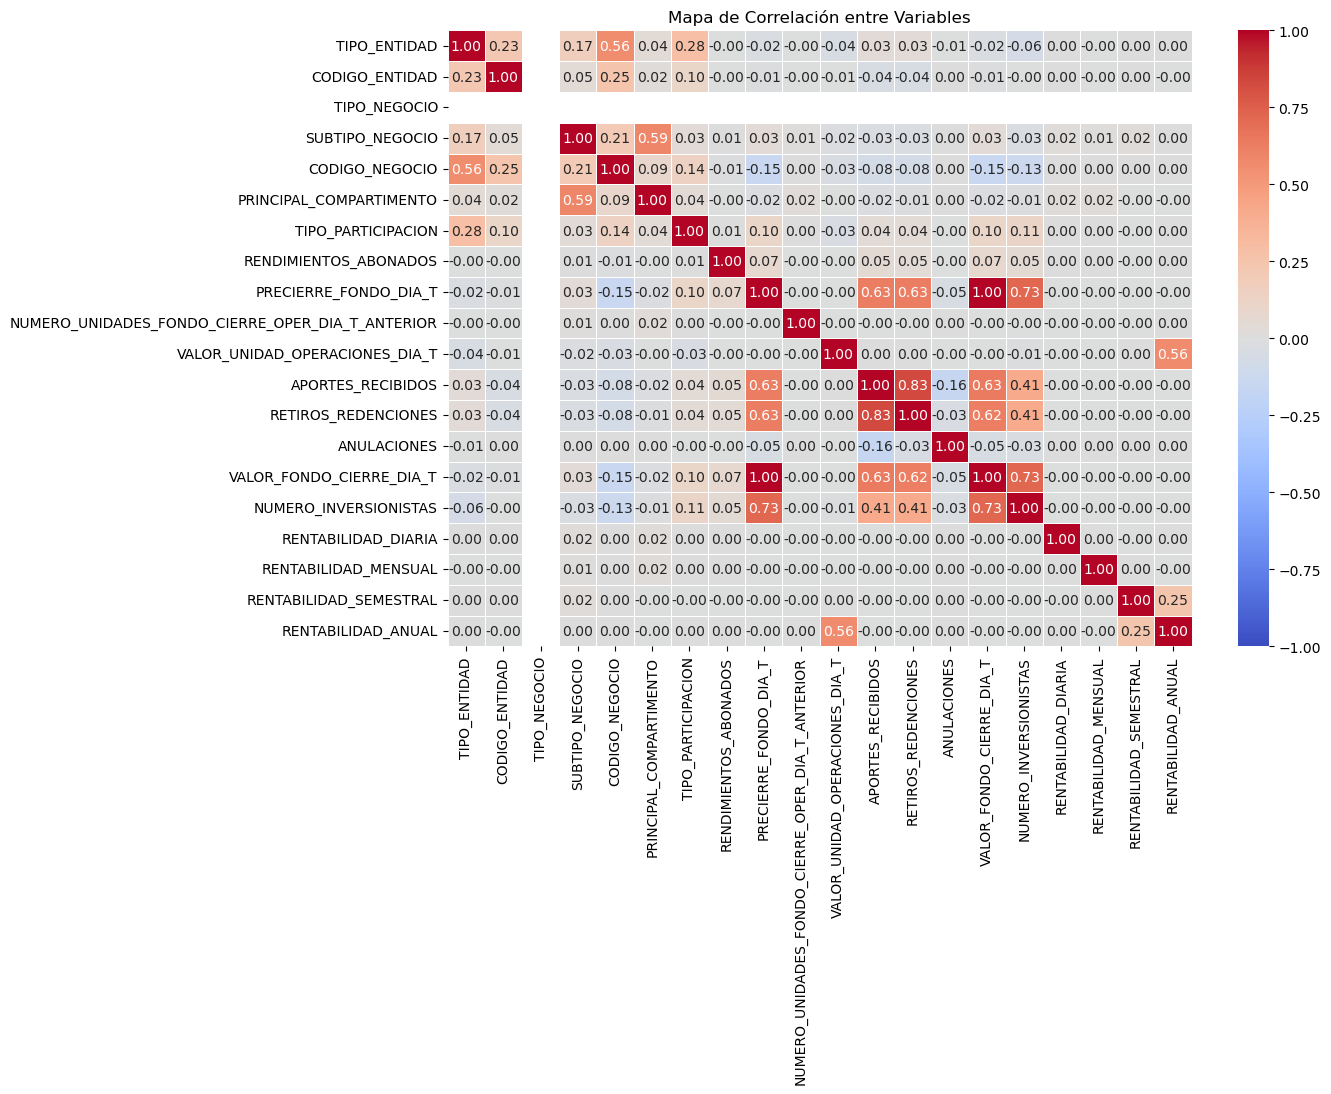

In [9]:
# Seleccionar solo las columnas numéricas
df_numeric = df.select_dtypes(include=["float64", "int64"])

# Calcular la matriz de correlación
corr = df_numeric.corr()

# Crear el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1)

# Título y visualización
plt.title("Mapa de Correlación entre Variables")
plt.show()

En base al mapa de correlación, eliminamos aquellas variables que no aportarian mucho para el modelo de regresión.

In [24]:
columns_to_drop = ['CODIGO_ENTIDAD','NOMBRE_ENTIDAD','ANULACIONES', 'TIPO_PARTICIPACION', 'NOMBRE_TIPO_PATRIMONIO','NOMBRE_PATRIMONIO', 'CODIGO_NEGOCIO', 'TIPO_NEGOCIO','NUMERO_UNIDADES_FONDO_CIERRE_OPER_DIA_T_ANTERIOR','VALOR_UNIDAD_OPERACIONES_DIA_T']

df = df.drop(columns=columns_to_drop, errors='ignore')

print(df.head())


  FECHA_CORTE  TIPO_ENTIDAD                NOMBRE_TIPO_ENTIDAD  \
0  2020-07-06             5             SF-SOCIEDAD FIDUCIARIA   
1  2023-08-23             5             SF-SOCIEDAD FIDUCIARIA   
2  2024-05-31            85  COMISIONISTAS DE BOLSA DE VALORES   
3  2022-09-09             5             SF-SOCIEDAD FIDUCIARIA   
4  2022-10-01             5             SF-SOCIEDAD FIDUCIARIA   

   SUBTIPO_NEGOCIO NOMBRE_SUBTIPO_PATRIMONIO  PRINCIPAL_COMPARTIMENTO  \
0                1       FIC DE TIPO GENERAL                        1   
1                1       FIC DE TIPO GENERAL                        1   
2                3         FIC INMOBILIARIAS                        1   
3                1       FIC DE TIPO GENERAL                        1   
4                1       FIC DE TIPO GENERAL                        1   

   RENDIMIENTOS_ABONADOS  PRECIERRE_FONDO_DIA_T  APORTES_RECIBIDOS  \
0           5.017933e+04           2.772161e+08       6.293444e+07   
1           1.438341e+08

De esta manera, en vez de trabajar con las 26 variables de la base de datos estamos trabajando con 15.

## **2.2. Análisis Variables**

```{note}
En algunas gráficas se utlizó la escala en el eje y (o x) para mejorar la visualización de los datos.
```

### **2.2.1. Tipo de Entidad** 



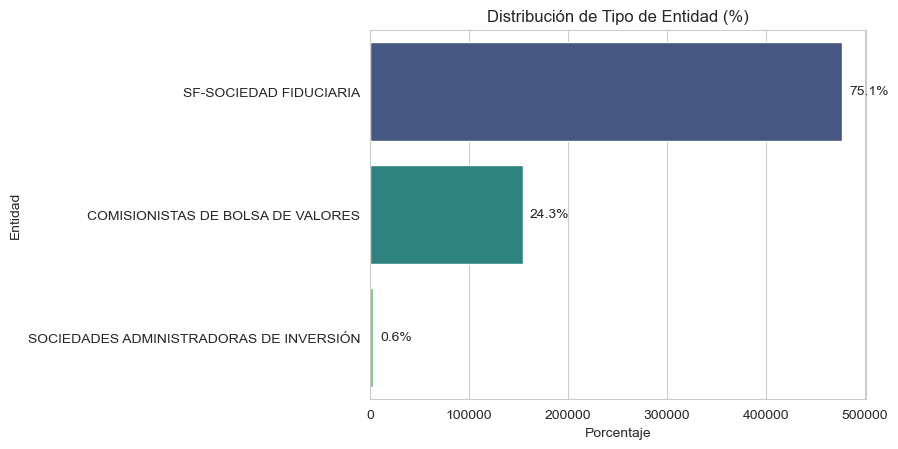

In [11]:
sns.set_style("whitegrid")

# Contar las frecuencias y calcular los porcentajes
total = len(df)
ax = sns.countplot(y=df["NOMBRE_TIPO_ENTIDAD"], order=df["NOMBRE_TIPO_ENTIDAD"].value_counts().index, palette="viridis")

# Agregar etiquetas con porcentajes automáticamente
for container in ax.containers:
    ax.bar_label(container, fmt=lambda x: f"{(x/total)*100:.1f}%", fontsize=10, padding=5)

# Personalización
plt.title("Distribución de Tipo de Entidad (%)")
plt.xlabel("Porcentaje")
plt.ylabel("Entidad")

plt.show()


Vemos que la mayoria se encuentra en las sociedades fiduciarias, seguidas por las comisionistas de bolsa de valores, mientras que las sociedades administradoras de inversión tienen una participación mínima.

### **2.2.2. Principal Compartimento**



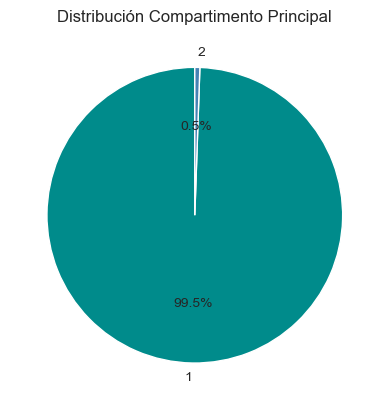

PRINCIPAL_COMPARTIMENTO
1    99.452755
2     0.547245
Name: proportion, dtype: float64

In [12]:
sex_count = df["PRINCIPAL_COMPARTIMENTO"].value_counts()
plt.pie(sex_count, labels = sex_count.index, autopct="%1.1f%%", startangle=90, colors = ["darkcyan", "steelblue"] )
plt.title("Distribución Compartimento Principal")
plt.show()
df["PRINCIPAL_COMPARTIMENTO"].value_counts()
df["PRINCIPAL_COMPARTIMENTO"].value_counts(normalize=True) * 100

Esto nos muestra que el 99.5% de los fondos no tienen compartimentos (valor 1, única unidad), mientras que el 0.5% sí están divididos en compartimentos (valor 2).

### **2.2.3. Rendimientos Abonados** 

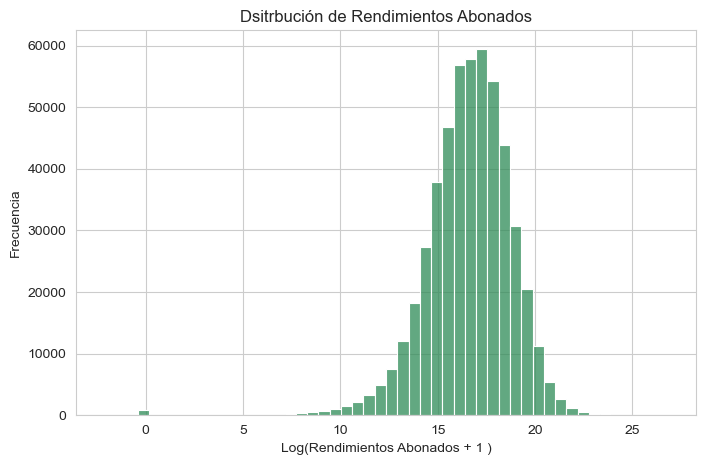

In [13]:
df["log_rendi"] = np.log1p(df["RENDIMIENTOS_ABONADOS"])

plt.figure(figsize=(8, 5))
sns.histplot(df["log_rendi"].dropna(), bins=50, color="seagreen")
plt.xlabel("Log(Rendimientos Abonados + 1 )")
plt.ylabel("Frecuencia")
plt.title("Dsitrbución de Rendimientos Abonados")
plt.show()

Aqui se muestra la distribución de los rendimientos abonados aplicando una transformación logarítmica.

### **2.2.4. Subtipo  de Negocio** 

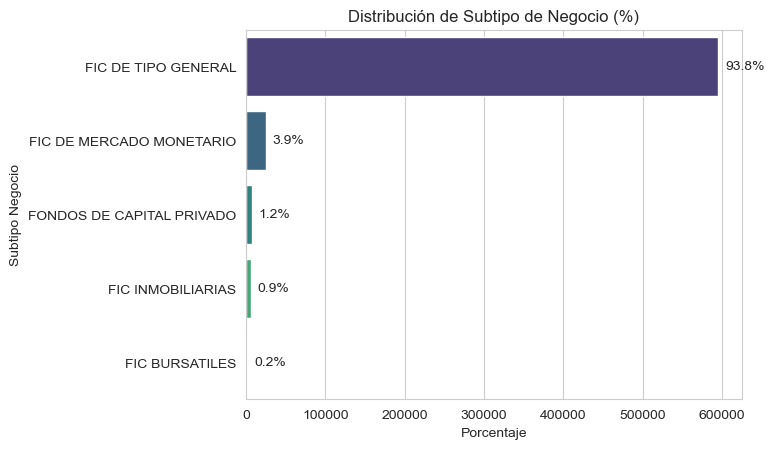

In [14]:
sns.set_style("whitegrid")

# Contar las frecuencias y calcular los porcentajes
total = len(df)
ax = sns.countplot(y=df["NOMBRE_SUBTIPO_PATRIMONIO"], order=df["NOMBRE_SUBTIPO_PATRIMONIO"].value_counts().index, palette="viridis")

# Agregar etiquetas con porcentajes automáticamente
for container in ax.containers:
    ax.bar_label(container, fmt=lambda x: f"{(x/total)*100:.1f}%", fontsize=10, padding=5)

# Personalización
plt.title("Distribución de Subtipo de Negocio (%)")
plt.xlabel("Porcentaje")
plt.ylabel("Subtipo Negocio")

plt.show()

El gráfico muestra que la mayoría de los fondos pertenecen al subtipo "FIC de Tipo General" (66.9%), seguido por "Fondos de Capital Privado" (27.9%), mientras que los demás subtipos tienen una representación muy baja.

### **2.2.5. Valor Del Fondo al Cerrar en el Dia T** 

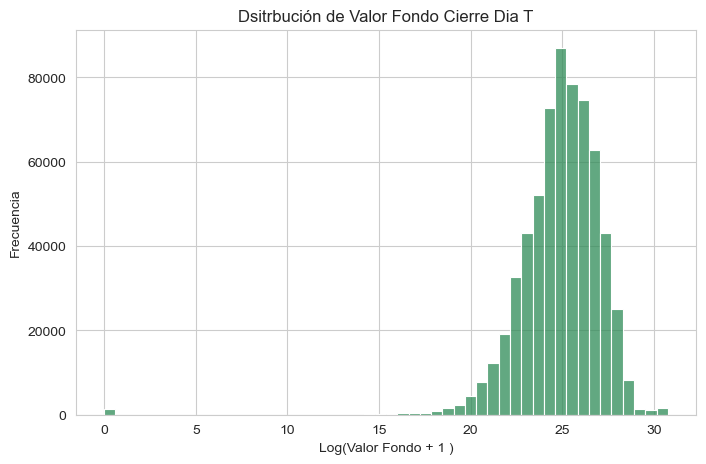

In [15]:
df["log_valor"] = np.log1p(df["VALOR_FONDO_CIERRE_DIA_T"])

plt.figure(figsize=(8, 5))
sns.histplot(df["log_valor"].dropna(), bins=50, color="seagreen")
plt.xlabel("Log(Valor Fondo + 1 )")
plt.ylabel("Frecuencia")
plt.title("Dsitrbución de Valor Fondo Cierre Dia T")
plt.show()

El histograma muestra una distribución sesgada a la derecha con una gran cantidad de valores en cero, sugiriendo la posible mezcla de dos grupos de datos. La transformación logarítmica ayuda a estabilizar la varianza y hacer la distribución más manejable.

### **2.2.6. Distribución de Rentalidades (*Diaria, Mensual, Semestral, Anual*)**

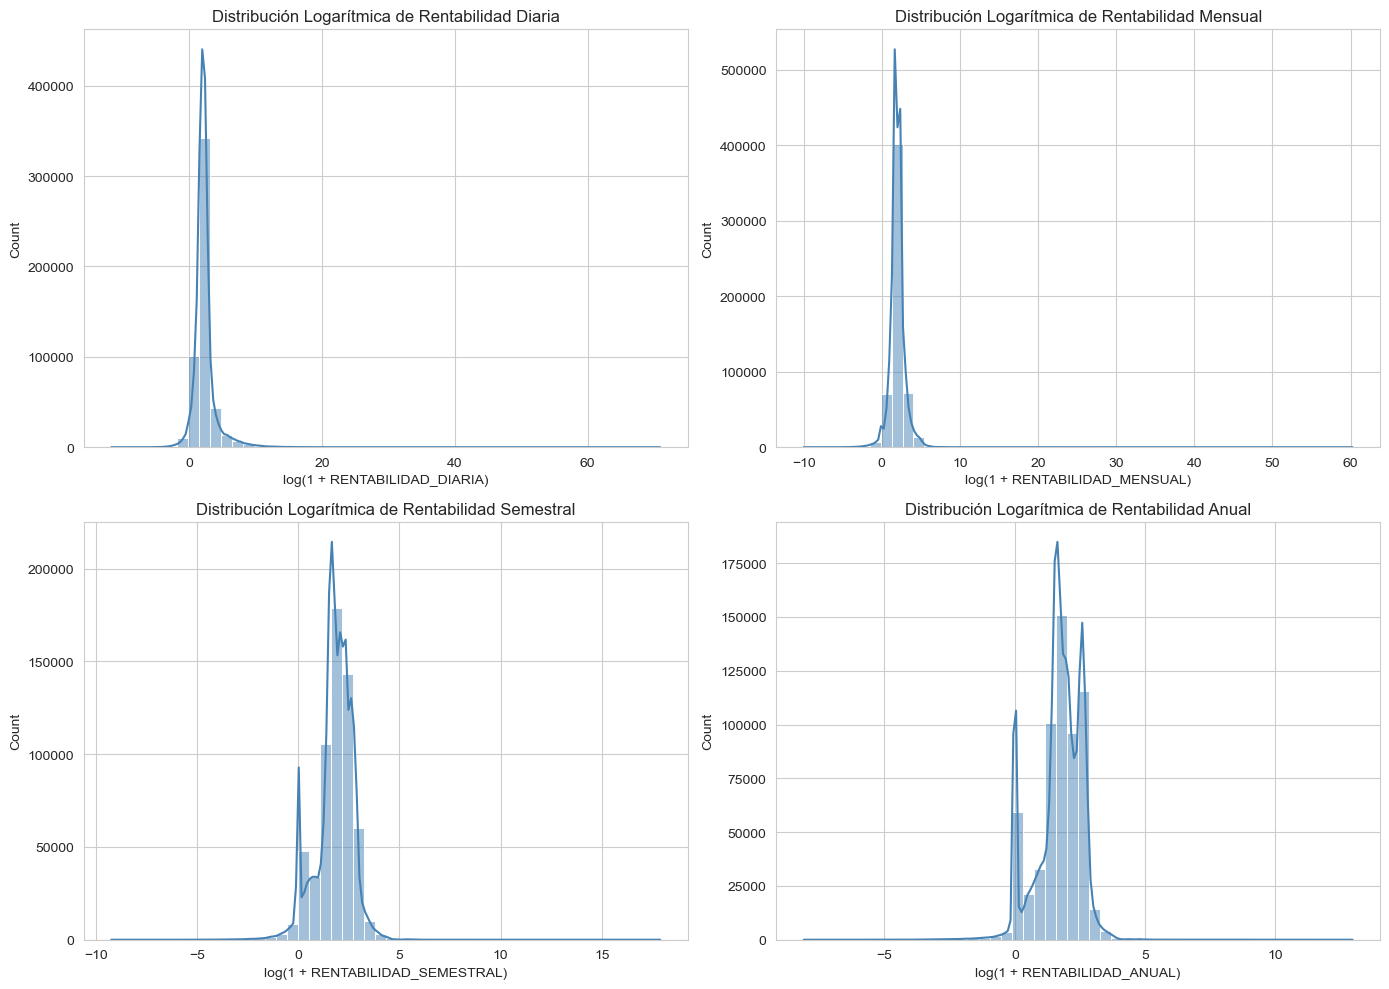

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Columnas y títulos
cols = ["RENTABILIDAD_DIARIA", "RENTABILIDAD_MENSUAL", "RENTABILIDAD_SEMESTRAL", "RENTABILIDAD_ANUAL"]
titles = ["Diaria", "Mensual", "Semestral", "Anual"]

# Crear histogramas con transformación logarítmica
for i, ax in enumerate(axes.flatten()):
    sns.histplot(np.log1p(df[cols[i]]), bins=50, kde=True, ax=ax, color="steelblue")
    ax.set_title(f"Distribución Logarítmica de Rentabilidad {titles[i]}")
    ax.set_xlabel(f"log(1 + {cols[i]})")  # Etiqueta del eje X con la transformación aplicada

# Ajustar diseño
plt.tight_layout()
plt.show()

 Se observa que en todos los casos la distribución está fuertemente sesgada a la derecha, con una gran concentración de valores cerca de cero y algunos valores extremos.

```{note}
En algunas gráficas se utlizó la escala en el eje $y$ (o $x$) para mejorar la visualización de los datos.
```

### **2.2.7. Total de Retiros y Redenciones por Tipo de Entidad**

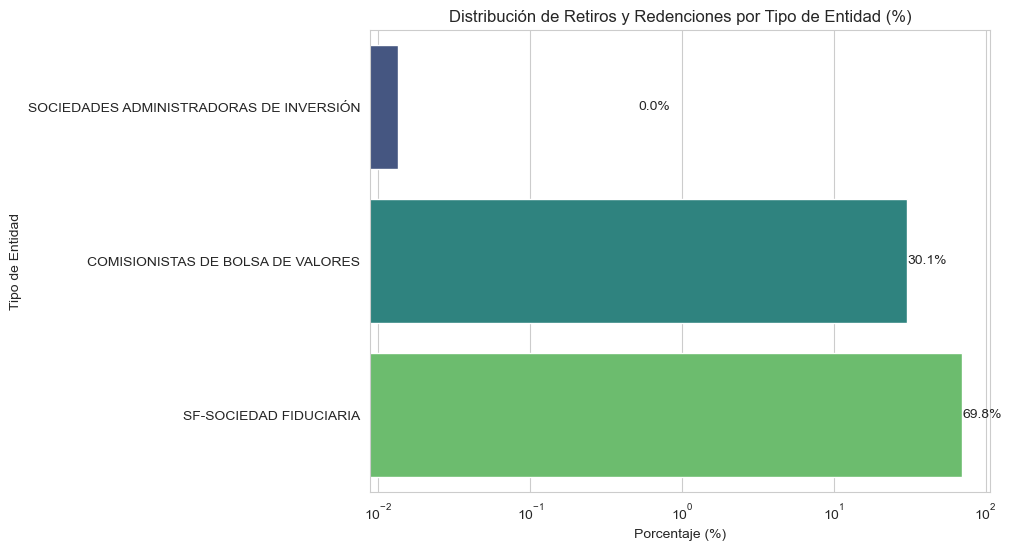

In [17]:

# Agrupar y calcular la suma por tipo de entidad
df_grouped = df.groupby("NOMBRE_TIPO_ENTIDAD", as_index=False)["RETIROS_REDENCIONES"].sum()

# Calcular el porcentaje sobre el total
df_grouped["Porcentaje"] = (df_grouped["RETIROS_REDENCIONES"] / df_grouped["RETIROS_REDENCIONES"].sum()) * 100

# Ordenar de mayor a menor
df_grouped = df_grouped.sort_values(by="Porcentaje", ascending=True)

plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_grouped, y="NOMBRE_TIPO_ENTIDAD", x="Porcentaje", palette="viridis")

plt.title("Distribución de Retiros y Redenciones por Tipo de Entidad (%)")
plt.xlabel("Porcentaje (%)")
plt.ylabel("Tipo de Entidad")
plt.xscale("log")
# Agregar etiquetas con los valores de porcentaje en las barras
for i, p in enumerate(ax.patches):
    ax.text(p.get_width() + 0.5, p.get_y() + p.get_height() / 2, f"{p.get_width():.1f}%", va="center")

plt.show()


El gráfico muestra que las Sociedades Fiduciarias y las Comisionistas de Bolsa de Valores tienen los montos más altos de retiros y redenciones, mientras que las Sociedades Administradoras de Inversión presentan valores significativamente menores. 

### **2.2.8. Aportes Recibidos por Subtipo de Negocio**

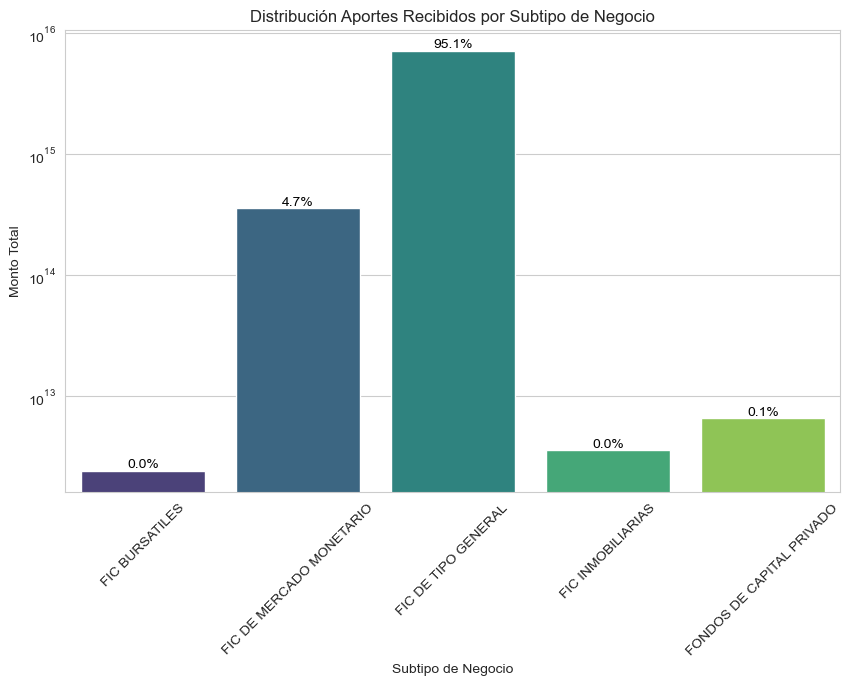

In [18]:
# Agrupar por subtipo de negocio y calcular la suma de aportaciones
df_grouped = df.groupby("NOMBRE_SUBTIPO_PATRIMONIO")["APORTES_RECIBIDOS"].sum().reset_index()

# Calcular el porcentaje sobre el total
df_grouped["Porcentaje"] = (df_grouped["APORTES_RECIBIDOS"] / df_grouped["APORTES_RECIBIDOS"].sum()) * 100

# Transformar los datos para que seaborn lo entienda mejor
df_melted = df_grouped.melt(id_vars=["NOMBRE_SUBTIPO_PATRIMONIO", "Porcentaje"], 
                            value_vars=["APORTES_RECIBIDOS"], 
                            var_name="Tipo", value_name="Monto")

# Crear el gráfico
plt.figure(figsize=(10,6))
ax = sns.barplot(data=df_melted, x="NOMBRE_SUBTIPO_PATRIMONIO", y="Monto", palette='viridis')
plt.yscale("log")

# Agregar etiquetas de porcentaje en cada barra
for i, p in enumerate(ax.patches):
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), 
            f"{df_grouped['Porcentaje'].iloc[i]:.1f}%", 
            ha="center", va="bottom", fontsize=10, color="black")

# Personalización
plt.xlabel("Subtipo de Negocio")
plt.ylabel("Monto Total")
plt.title("Distribución Aportes Recibidos por Subtipo de Negocio")
plt.xticks(rotation=45)

# Mostrar gráfico
plt.show()


El gráfico muestra claramente la distribución de los aportes recibidos por cada subtipo de negocio donde el uso de una escala logarítmica en el eje y resalta la diferencia en los montos entre los diferentes subtipos de negocio.

### **2.2.9. Relación entre Valor total del fondo al cierre del día T y Precio de cierre del fondo en el día T**

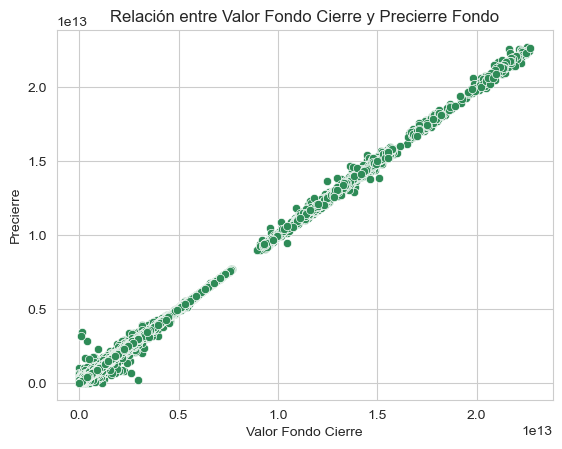

In [19]:
sns.scatterplot(data=df, x="VALOR_FONDO_CIERRE_DIA_T", y="PRECIERRE_FONDO_DIA_T", color='seagreen')

plt.xlabel("Valor Fondo Cierre")
plt.ylabel("Precierre")
plt.title("Relación entre Valor Fondo Cierre y Precierre Fondo")
plt.show()

El gráfico de dispersión muestra una relación lineal perfecta entre el Valor Fondo Cierre y el Preciere Fondo, ya que el coeficiente de relación es 1. Esto indica que los valores en ambos ejes siguen exactamente la misma tendencia sin desviaciones.

### **2.2.10. Retiros y Redenciones por Mes**

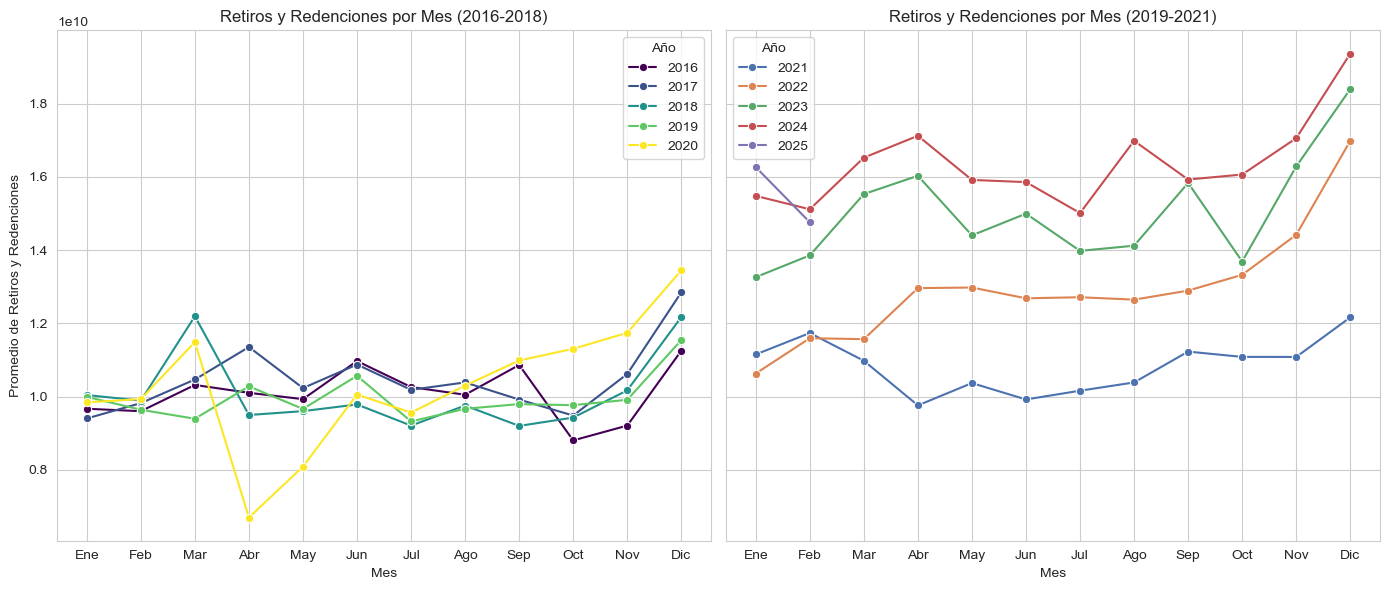

In [20]:

# Convertir fecha a datetime
df["FECHA_CORTE"] = pd.to_datetime(df["FECHA_CORTE"], dayfirst=True, errors='coerce')

# Crear columnas de Año y Mes
df["AÑO"] = df["FECHA_CORTE"].dt.year
df["MES"] = df["FECHA_CORTE"].dt.month

# Agrupar por Año y Mes
df_grouped = df.groupby(["AÑO", "MES"])["RETIROS_REDENCIONES"].mean().reset_index()

# Separar en dos grupos de años
grupo1 = df_grouped[df_grouped["AÑO"].between(2016, 2020)]
grupo2 = df_grouped[df_grouped["AÑO"].between(2021, 2025)]

# Crear figura con dos subgráficos
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Gráfico 1 (2016-2020)
sns.lineplot(
    data=grupo1, x="MES", y="RETIROS_REDENCIONES", hue="AÑO", marker="o", palette="viridis", ax=axes[0]
)
axes[0].set_title("Retiros y Redenciones por Mes (2016-2018)")
axes[0].set_xlabel("Mes")
axes[0].set_ylabel("Promedio de Retiros y Redenciones")
axes[0].set_xticks(range(1, 13))
axes[0].set_xticklabels(["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"])
axes[0].legend(title="Año")

# Gráfico 2 (2021-2025)
sns.lineplot(
    data=grupo2, x="MES", y="RETIROS_REDENCIONES", hue="AÑO", marker="o", palette="deep", ax=axes[1]
)
axes[1].set_title("Retiros y Redenciones por Mes (2019-2021)")
axes[1].set_xlabel("Mes")
axes[1].set_ylabel("")
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"])
axes[1].legend(title="Año")

# Ajustar diseño y mostrar
plt.tight_layout()
plt.show()


Se observan variaciones en los patrones entre ambos períodos, con algunas fluctuaciones notables en ciertos meses.

### **2.2.11. Numero de Inversionistas por Subtipo**

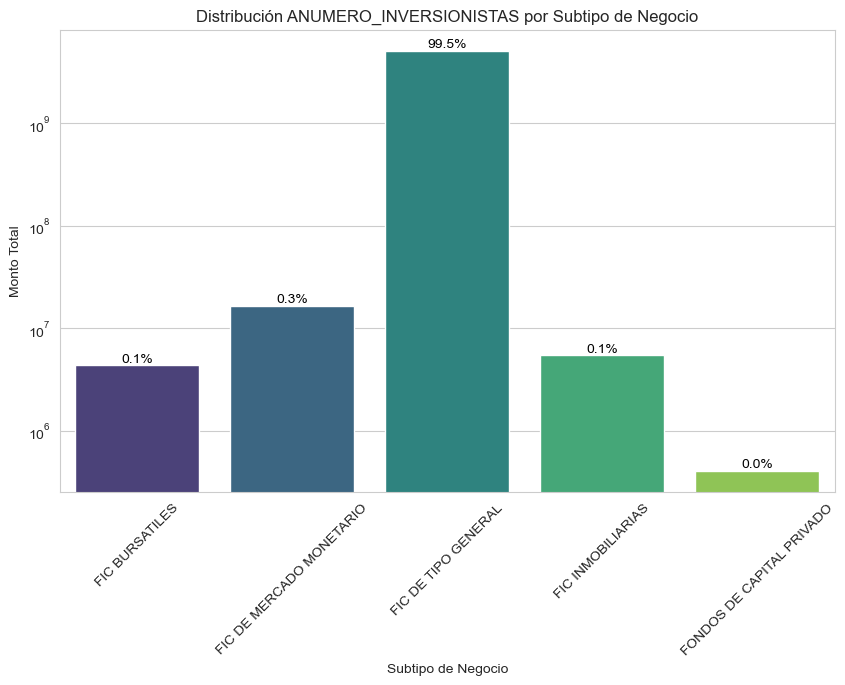

In [21]:
# Agrupar por subtipo de negocio y calcular la suma de NUMERO_INVERSIONISTAS
df_grouped = df.groupby("NOMBRE_SUBTIPO_PATRIMONIO")["NUMERO_INVERSIONISTAS"].sum().reset_index()

# Calcular el porcentaje sobre el total
df_grouped["Porcentaje"] = (df_grouped["NUMERO_INVERSIONISTAS"] / df_grouped["NUMERO_INVERSIONISTAS"].sum()) * 100

# Transformar los datos para que seaborn lo entienda mejor
df_melted = df_grouped.melt(id_vars=["NOMBRE_SUBTIPO_PATRIMONIO", "Porcentaje"], 
                            value_vars=["NUMERO_INVERSIONISTAS"], 
                            var_name="Tipo", value_name="Monto")

# Crear el gráfico
plt.figure(figsize=(10,6))
ax = sns.barplot(data=df_melted, x="NOMBRE_SUBTIPO_PATRIMONIO", y="Monto", palette='viridis')
plt.yscale("log")

# Agregar etiquetas de porcentaje en cada barra
for i, p in enumerate(ax.patches):
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), 
            f"{df_grouped['Porcentaje'].iloc[i]:.1f}%", 
            ha="center", va="bottom", fontsize=10, color="black")

# Personalización
plt.xlabel("Subtipo de Negocio")
plt.ylabel("Monto Total")
plt.title("Distribución ANUMERO_INVERSIONISTAS por Subtipo de Negocio")
plt.xticks(rotation=45)

# Mostrar gráfico
plt.show()


Este gráfico de barras muestra la distribución del número de inversionistas por subtipo de negocio. Se observa que la categoría "FIC DE TIPO GENERAL" domina con $99.5\%$ del total, lo que indica que la mayoría de los inversionistas se concentran en este tipo de fondo.

### **2.2.12. Valor del Fondo al cierre del dia T por Mes**

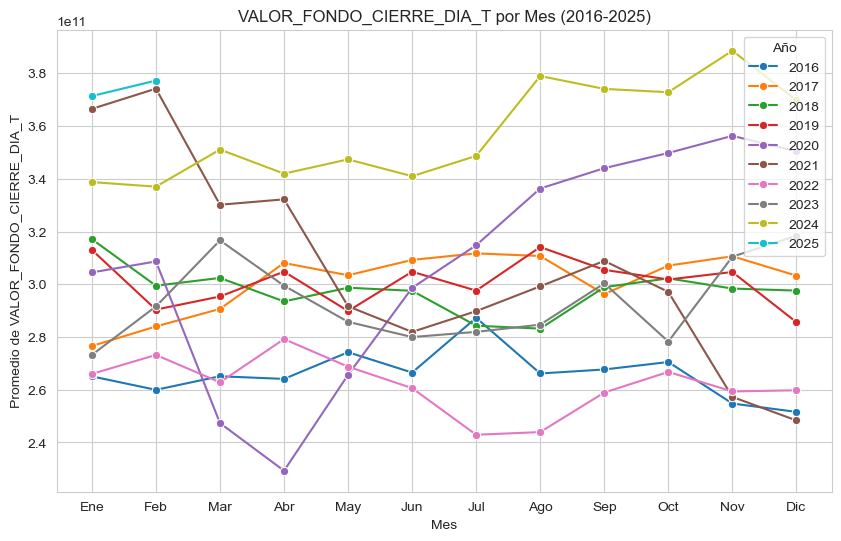

In [22]:
# Convertir fecha a datetime
df["FECHA_CORTE"] = pd.to_datetime(df["FECHA_CORTE"], dayfirst=True, errors='coerce')

# Crear columnas de Año y Mes
df["AÑO"] = df["FECHA_CORTE"].dt.year
df["MES"] = df["FECHA_CORTE"].dt.month

# Agrupar por Año y Mes
df_grouped = df.groupby(["AÑO", "MES"])["VALOR_FONDO_CIERRE_DIA_T"].mean().reset_index()

# Crear figura
plt.figure(figsize=(10, 6))

# Gráfico con todos los años
sns.lineplot(
    data=df_grouped, x="MES", y="VALOR_FONDO_CIERRE_DIA_T", hue="AÑO", marker="o", palette="tab10"
)

# Personalizar etiquetas y título
plt.title("VALOR_FONDO_CIERRE_DIA_T por Mes (2016-2025)")
plt.xlabel("Mes")
plt.ylabel("Promedio de VALOR_FONDO_CIERRE_DIA_T")
plt.xticks(range(1, 13), ["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"])
plt.legend(title="Año")

# Mostrar gráfico
plt.show()


El gráfico muestra un crecimiento sostenido del valor del fondo entre 2016 y 2021, con un pico notable en 2020, posiblemente debido a la pandemia, y una estabilización en 2021.

## **2.3. Variables para el Modelo**

En el sector financiero, comprender los factores que influyen en los retiros y redenciones de los fondos de inversión es clave para la gestión de riesgos y la toma de decisiones estratégicas. La pregunta central que buscamos responder es:

¿Cuáles son las principales variables que impactan el monto de retiros y redenciones en los fondos de inversión?

Para ello, analizamos el comportamiento de la variable respuesta (`RETIROS_REDENCIONES`), en función de un conjunto de variables predictoras que podrían influir en su variabilidad.

* `APORTES_RECIBIDOS` (cantidad de dinero ingresado)
* `PRECIERRE_FONDO_DIA_T` (precio de cierre de la unidad del fondo)
* `NUMERO_INVERSIONISTAS` (Número de inversionistas)
* `TIPO_ENTIDAD` (tipo de entidad financiera)



### **2.3.1. Revisión de Multicolinealidad**

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Definir variables predictoras (sin la variable respuesta)
X = df[["APORTES_RECIBIDOS", "TIPO_PARTICIPACION", "PRECIERRE_FONDO_DIA_T",  "NUMERO_INVERSIONISTAS", "TIPO_ENTIDAD"]]

# Agregar una columna de unos para la intersección (sesgo)
X = X.assign(Intercepto=1)

# Calcular el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                Variable       VIF
0      APORTES_RECIBIDOS  1.665495
1     TIPO_PARTICIPACION  1.108879
2  PRECIERRE_FONDO_DIA_T  2.912800
3  NUMERO_INVERSIONISTAS  2.145563
4           TIPO_ENTIDAD  1.102285
5             Intercepto  0.000000


El modelo no parece tener problemas significativos de multicolinealidad, por lo que no es necesario eliminar o transformar variables en este aspecto.